In [1]:
from IPython.display import display, clear_output
import keyboard
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ['cmr10'],    
    "axes.labelsize": 20, 
    "axes.titlesize": 22, 
    "xtick.labelsize": 18, 
    "ytick.labelsize": 18, 
    "legend.fontsize": 18,
    "figure.figsize": [9,6], 
    "figure.dpi": 300 
})




#### Definimos: $$t(\omega)=\frac{-\kappa}{(\Omega-\omega)-i\kappa-i\frac{g^2}{i(\Delta E-\omega)+\gamma}}$$

In [2]:
def t_w (w, k, Omega, DeltaE, gamma, g):
    numerador = -k
    denominador = (Omega-w) - 1j * k - 1j * g**2 / (1j * (DeltaE - w) + gamma)
    t = numerador / denominador
    return abs(t)

 # Experimental data

## Creamos base de datos

In [3]:
# Los datos presentan 41 campos magnéticos distintos, con cortes de 2500 frecuencias

datos = np.loadtxt('ExpData.txt', skiprows=1)
magnetic = datos[:,0]
frequencies = datos[:,1]
transmission = datos[:,2]

# Guardamos los distintos campos magnéticos
mfield = np.unique(magnetic)

# Contamos el número de frecuencias 
numFrecs = len(magnetic) // len(mfield)

# Guardamos las frecuencias y transmisiones
frecs = np.zeros((len(mfield), numFrecs))
trans = np.zeros((len(mfield), numFrecs))
for i, field in enumerate(mfield):
    indices = np.where(magnetic == field)[0]
    frecs[i, :] = frequencies[indices]
    trans[i, :] = transmission[indices] # Los datos vienen invertidos respecto de neustra fórmula


print(f'Los datos experimentales presentan {len(mfield)} campos magnéticos distintos')
print(f'y cada campo tiene {numFrecs} frecuencias distintas')

Los datos experimentales presentan 41 campos magnéticos distintos
y cada campo tiene 2500 frecuencias distintas


## Dibujamos ***Contour plot***

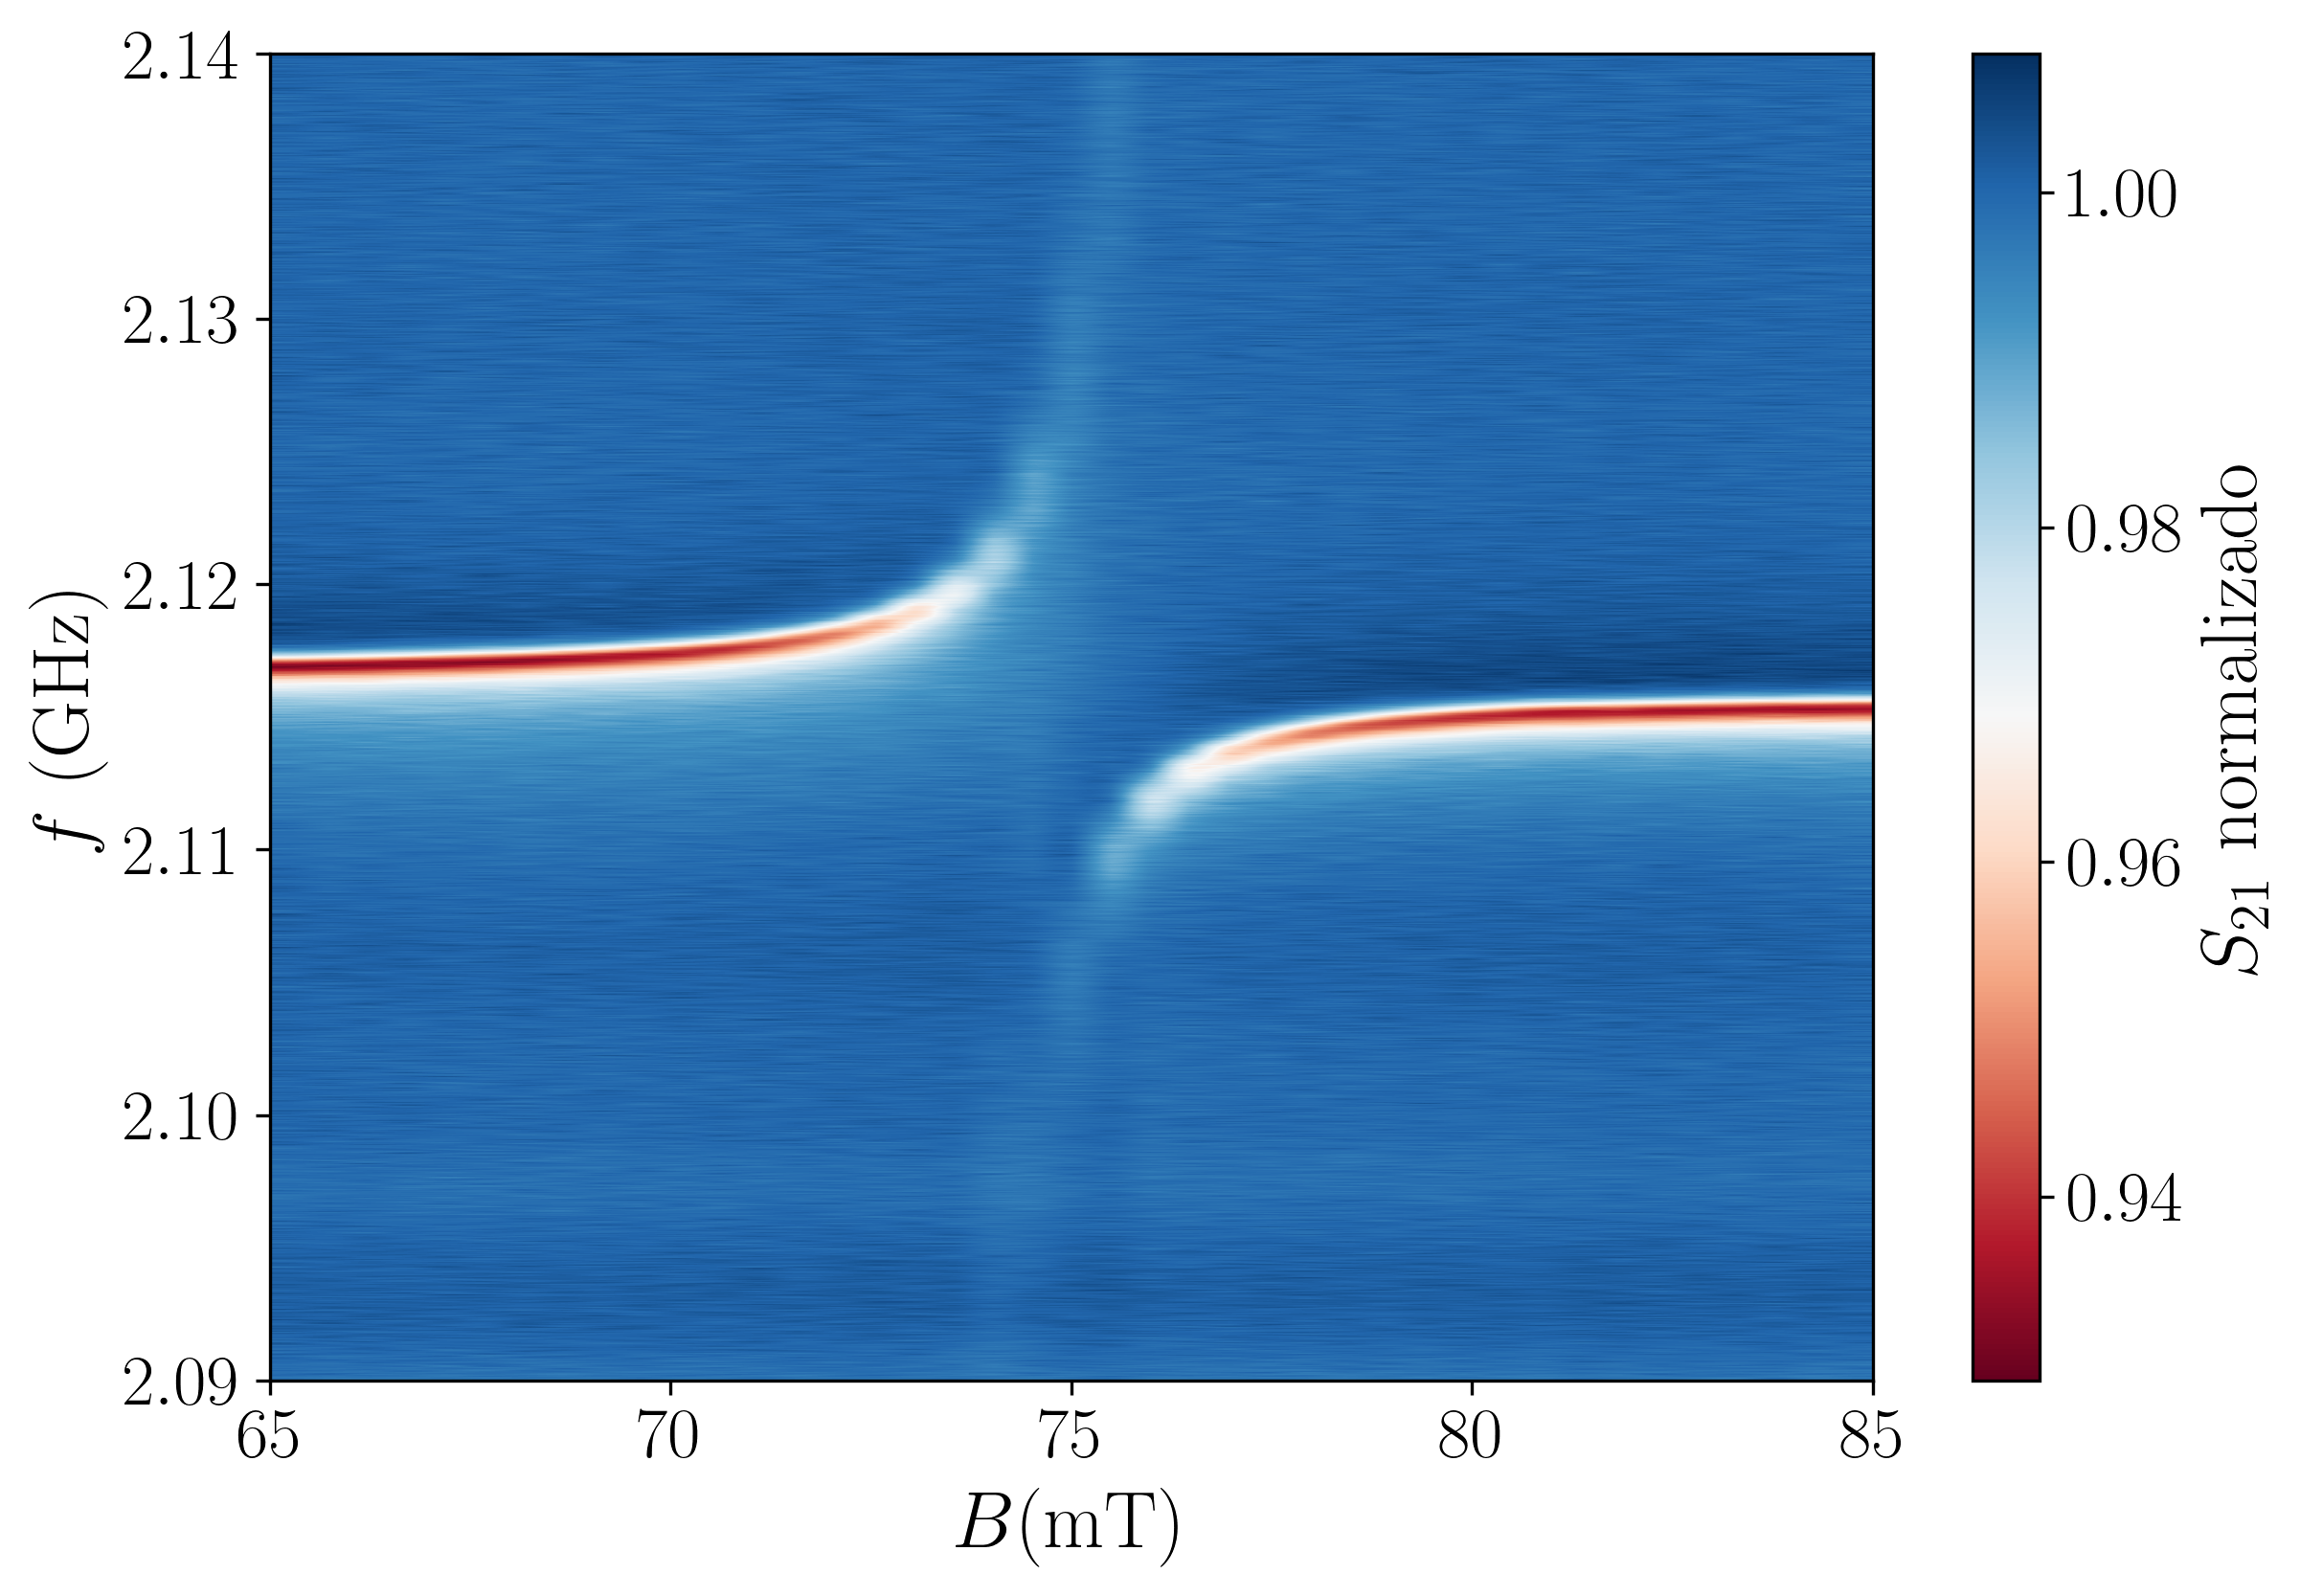

In [8]:
plt.imshow(trans.T, extent=[mfield.min(), mfield.max(), frecs.min(), frecs.max()],
                cmap='RdBu', origin='lower',
                    aspect='auto', interpolation='spline16') #Para evitar pixeles usar -spline16-, para pixeles -none- o -nearest-
cbar = plt.colorbar(label='$S_{21}$ normalizado')
cbar.set_ticks(np.arange(0.94,1.0,0.02))
plt.xlabel('$B$(mT)')
plt.ylabel('$f$ (GHz)')
plt.show()